In [34]:
import pandas as pd
import numpy as np
import geopandas as gpd

In [21]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",20)


In [22]:
crime_table = pd.read_csv("dataset_current.csv")
crime_table_historical = pd.read_csv("dataset_historical.csv")

df = pd.concat([crime_table,crime_table_historical])
df.where(df['ReportedYear']>2017).dropna()
df = df.drop(['ReportedDateTime','Location','WeaponUsed','NSP','POLICE','TRACT','WARD','ZIP'],axis = 1)

df

C:\Users\shinj\anaconda3\envs\geo\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,IncidentNum,ReportedYear,ReportedMonth,ALD,RoughX,RoughY,Arson,AssaultOffense,Burglary,CriminalDamage,Homicide,LockedVehicle,Robbery,SexOffense,Theft,VehicleTheft
0,213370032,2021,12,11.0,2.545666e+06,367030.730972,0,1,0,0,0,0,0,0,0,0
1,213370080,2021,12,1.0,2.540891e+06,411450.962692,0,0,0,0,0,0,0,0,1,0
2,213360166,2021,12,15.0,2.544385e+06,391319.863441,0,1,0,0,0,0,0,0,0,0
3,213360169,2021,12,2.0,2.531349e+06,412680.931212,0,1,0,0,0,0,0,0,0,0
4,213360137,2021,12,5.0,2.523364e+06,405935.349436,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729934,213060042,2020,11,3.0,2.561775e+06,389952.397000,0,0,0,0,0,1,0,0,0,0
729935,213060082,2020,10,8.0,2.547880e+06,372325.112000,0,1,0,0,0,0,0,0,0,0
729936,213070035,2020,11,3.0,2.561719e+06,395455.935000,0,0,0,0,0,0,0,0,0,1
729937,213070196,2019,7,6.0,2.558562e+06,396736.043000,0,0,0,0,0,0,0,0,1,0


In [23]:
crime_table_historical.isnull().sum()

IncidentNum             0
ReportedDateTime        0
ReportedYear            0
ReportedMonth           0
Location            14222
                    ...  
LockedVehicle           0
Robbery                 0
SexOffense              0
Theft                   0
VehicleTheft            0
Length: 24, dtype: int64

In [24]:
data = [['Marquette University',2551599.733000, 385381.279000]]
  
df_marquette = pd.DataFrame(data, columns = ['Name','RoughX', 'RoughY'])

df_geo_marquette=gpd.GeoDataFrame(df_marquette,geometry=gpd.points_from_xy(df_marquette.RoughX,df_marquette.RoughY)) #creates geometry columndq
df_geo_marquette.head()

,Name,RoughX,RoughY,geometry
0,Marquette University,2551599.733,385381.279,POINT (2551599.733 385381.279)


In [25]:
df_gdf=gpd.GeoDataFrame(df,geometry=gpd.points_from_xy(df.RoughX,df.RoughY)) #creates geometry columns
df_gdf.head()

,IncidentNum,ReportedYear,ReportedMonth,ALD,RoughX,RoughY,Arson,AssaultOffense,Burglary,CriminalDamage,Homicide,LockedVehicle,Robbery,SexOffense,Theft,VehicleTheft,geometry
0,213370032,2021,12,11.0,2.545666e+06,367030.730972,0,1,0,0,0,0,0,0,0,0,POINT (2545665.878 367030.731)
1,213370080,2021,12,1.0,2.540891e+06,411450.962692,0,0,0,0,0,0,0,0,1,0,POINT (2540890.729 411450.963)
2,213360166,2021,12,15.0,2.544385e+06,391319.863441,0,1,0,0,0,0,0,0,0,0,POINT (2544384.796 391319.863)
3,213360169,2021,12,2.0,2.531349e+06,412680.931212,0,1,0,0,0,0,0,0,0,0,POINT (2531348.937 412680.931)
4,213360137,2021,12,5.0,2.523364e+06,405935.349436,0,1,0,0,0,0,0,0,0,0,POINT (2523363.890 405935.349)


In [26]:
df2=df.groupby('ALD').count()
df2
#df_gdf['count']=df2['IncidentNum']

,IncidentNum,ReportedYear,ReportedMonth,RoughX,RoughY,Arson,AssaultOffense,Burglary,CriminalDamage,Homicide,LockedVehicle,Robbery,SexOffense,Theft,VehicleTheft,geometry
ALD,,,,,,,,,,,,,,,,
0.0,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198
1.0,63606,63606,63606,63606,63606,63606,63606,63606,63606,63606,63606,63606,63606,63606,63606,63606
2.0,60738,60738,60738,60738,60738,60738,60738,60738,60738,60738,60738,60738,60738,60738,60738,60738
3.0,45425,45425,45425,45425,45425,45425,45425,45425,45425,45425,45425,45425,45425,45425,45425,45425
4.0,63701,63701,63701,63701,63701,63701,63701,63701,63701,63701,63701,63701,63701,63701,63701,63701
5.0,35328,35328,35328,35328,35328,35328,35328,35328,35328,35328,35328,35328,35328,35328,35328,35328
6.0,72169,72169,72169,72169,72169,72169,72169,72169,72169,72169,72169,72169,72169,72169,72169,72169
7.0,67469,67469,67469,67469,67469,67469,67469,67469,67469,67469,67469,67469,67469,67469,67469,67469
8.0,42015,42015,42015,42015,42015,42015,42015,42015,42015,42015,42015,42015,42015,42015,42015,42015


In [30]:
print(df2.iloc[5][0],df2.iloc[6][0],df2.iloc[7][0],df2.iloc[8][0], df2.iloc[9][0], df2.iloc[10][0], df2.iloc[15][0])


35328 72169 67469 42015 42830 37108 83373


In [31]:
counts = []
for row in df_gdf['ALD']:
    if row == 1:
        counts.append(df2.iloc[1][0])
    elif row == 2:
        counts.append(df2.iloc[2][0])
    elif row == 3:
        counts.append(df2.iloc[3][0])
    elif row == 4:
        counts.append(df2.iloc[4][0])
    elif row == 5:
        counts.append(df2.iloc[5][0])
    elif row == 6:
        counts.append(df2.iloc[6][0])
    elif row  == 7:
        counts.append(df2.iloc[7][0])
    elif row == 8:
        counts.append(df2.iloc[8][0])
    elif row == 9:
        counts.append(df2.iloc[9][0])
    elif row == 10:
        counts.append(df2.iloc[10][0])
    elif row == 11:
        counts.append(df2.iloc[11][0])
    elif row == 12:
        counts.append(df2.iloc[12][0])
    elif row == 13:
        counts.append(df2.iloc[13][0])
    elif row == 14:
        counts.append(df2.iloc[14][0])
    elif row ==15:
        counts.append(df2.iloc[15][0])
    else:
        counts.append(None)

df_gdf['count']=counts
#append 'count' column in DataFrame

In [32]:
df_gdf

,IncidentNum,ReportedYear,ReportedMonth,ALD,RoughX,RoughY,Arson,AssaultOffense,Burglary,CriminalDamage,Homicide,LockedVehicle,Robbery,SexOffense,Theft,VehicleTheft,geometry,count
0,213370032,2021,12,11.0,2.545666e+06,367030.730972,0,1,0,0,0,0,0,0,0,0,POINT (2545665.878 367030.731),20245.0
1,213370080,2021,12,1.0,2.540891e+06,411450.962692,0,0,0,0,0,0,0,0,1,0,POINT (2540890.729 411450.963),63606.0
2,213360166,2021,12,15.0,2.544385e+06,391319.863441,0,1,0,0,0,0,0,0,0,0,POINT (2544384.796 391319.863),83373.0
3,213360169,2021,12,2.0,2.531349e+06,412680.931212,0,1,0,0,0,0,0,0,0,0,POINT (2531348.937 412680.931),60738.0
4,213360137,2021,12,5.0,2.523364e+06,405935.349436,0,1,0,0,0,0,0,0,0,0,POINT (2523363.890 405935.349),35328.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729934,213060042,2020,11,3.0,2.561775e+06,389952.397000,0,0,0,0,0,1,0,0,0,0,POINT (2561774.569 389952.397),45425.0
729935,213060082,2020,10,8.0,2.547880e+06,372325.112000,0,1,0,0,0,0,0,0,0,0,POINT (2547879.658 372325.112),42015.0
729936,213070035,2020,11,3.0,2.561719e+06,395455.935000,0,0,0,0,0,0,0,0,0,1,POINT (2561719.325 395455.935),45425.0
729937,213070196,2019,7,6.0,2.558562e+06,396736.043000,0,0,0,0,0,0,0,0,1,0,POINT (2558562.352 396736.043),72169.0


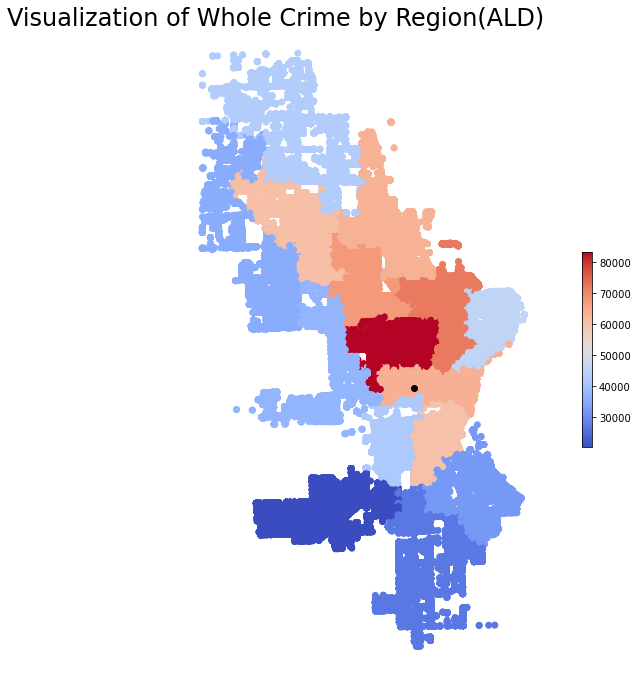

In [35]:
#df_gdf.plot(figsize=(15, 10));
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(15, 12))
df_gdf.plot(ax=ax, column='count', cmap='coolwarm', legend=True, legend_kwds={'shrink': 0.3})
df_geo_marquette.plot(ax=ax,color='black')
ax.axis('off');
fig.suptitle('Visualization of Whole Crime by Region(ALD)', y=0.9, fontsize=24);

# dataset of Assault

In [36]:
df_assault=df.where(df['AssaultOffense']==1).dropna()
df_assault

,IncidentNum,ReportedYear,ReportedMonth,ALD,RoughX,RoughY,Arson,AssaultOffense,Burglary,CriminalDamage,Homicide,LockedVehicle,Robbery,SexOffense,Theft,VehicleTheft,geometry,count
0,213370032,2021.0,12.0,11.0,2.545666e+06,367030.730972,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (2545665.878 367030.731),20245.0
2,213360166,2021.0,12.0,15.0,2.544385e+06,391319.863441,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (2544384.796 391319.863),83373.0
3,213360169,2021.0,12.0,2.0,2.531349e+06,412680.931212,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (2531348.937 412680.931),60738.0
4,213360137,2021.0,12.0,5.0,2.523364e+06,405935.349436,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (2523363.890 405935.349),35328.0
6,213360146,2021.0,12.0,3.0,2.561561e+06,389511.675661,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (2561560.825 389511.676),45425.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729911,212040097,2012.0,7.0,7.0,2.543789e+06,403835.896000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (2543789.040 403835.896),67469.0
729913,212060217,2020.0,6.0,9.0,2.536700e+06,415110.090000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (2536699.707 415110.090),42830.0
729920,212450122,2020.0,7.0,1.0,2.548998e+06,409303.020000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (2548997.790 409303.020),63606.0
729926,212930001,2020.0,10.0,12.0,2.553754e+06,373699.262000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (2553753.652 373699.262),60266.0


In [37]:
df_gdf_ass=gpd.GeoDataFrame(df_assault,geometry=gpd.points_from_xy(df_assault.RoughX,df_assault.RoughY)) #creates geometry columndq
df_gdf_ass.head()

,IncidentNum,ReportedYear,ReportedMonth,ALD,RoughX,RoughY,Arson,AssaultOffense,Burglary,CriminalDamage,Homicide,LockedVehicle,Robbery,SexOffense,Theft,VehicleTheft,geometry,count
0,213370032,2021.0,12.0,11.0,2.545666e+06,367030.730972,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (2545665.878 367030.731),20245.0
2,213360166,2021.0,12.0,15.0,2.544385e+06,391319.863441,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (2544384.796 391319.863),83373.0
3,213360169,2021.0,12.0,2.0,2.531349e+06,412680.931212,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (2531348.937 412680.931),60738.0
4,213360137,2021.0,12.0,5.0,2.523364e+06,405935.349436,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (2523363.890 405935.349),35328.0
6,213360146,2021.0,12.0,3.0,2.561561e+06,389511.675661,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (2561560.825 389511.676),45425.0


In [38]:
df2=df_assault.groupby('ALD').count()
df2

,IncidentNum,ReportedYear,ReportedMonth,RoughX,RoughY,Arson,AssaultOffense,Burglary,CriminalDamage,Homicide,LockedVehicle,Robbery,SexOffense,Theft,VehicleTheft,geometry,count
ALD,,,,,,,,,,,,,,,,,
1.0,17652,17652,17652,17652,17652,17652,17652,17652,17652,17652,17652,17652,17652,17652,17652,17652,17652
2.0,15367,15367,15367,15367,15367,15367,15367,15367,15367,15367,15367,15367,15367,15367,15367,15367,15367
3.0,3371,3371,3371,3371,3371,3371,3371,3371,3371,3371,3371,3371,3371,3371,3371,3371,3371
4.0,11800,11800,11800,11800,11800,11800,11800,11800,11800,11800,11800,11800,11800,11800,11800,11800,11800
5.0,6234,6234,6234,6234,6234,6234,6234,6234,6234,6234,6234,6234,6234,6234,6234,6234,6234
6.0,19339,19339,19339,19339,19339,19339,19339,19339,19339,19339,19339,19339,19339,19339,19339,19339,19339
7.0,18732,18732,18732,18732,18732,18732,18732,18732,18732,18732,18732,18732,18732,18732,18732,18732,18732
8.0,8806,8806,8806,8806,8806,8806,8806,8806,8806,8806,8806,8806,8806,8806,8806,8806,8806
9.0,11134,11134,11134,11134,11134,11134,11134,11134,11134,11134,11134,11134,11134,11134,11134,11134,11134


In [39]:
#df2.iloc[0][0]
#print(df2.iloc[5][0],df2.iloc[6][0],df2.iloc[7][0],df2.iloc[8][0], df2.iloc[9][0], df2.iloc[10][0], df2.iloc[11][0])


In [40]:
counts = []

for row in df_gdf_ass['ALD']:
    if row == 1:
        counts.append(df2.iloc[0][0])
    elif row == 2:
        counts.append(df2.iloc[1][0])
    elif row == 3:
        counts.append(df2.iloc[2][0])
    elif row == 4:
        counts.append(df2.iloc[3][0])
    elif row == 5:
        counts.append(df2.iloc[4][0])
    elif row == 6:
        counts.append(df2.iloc[5][0])
    elif row  == 7:
        counts.append(df2.iloc[6][0])
    elif row == 8:
        counts.append(df2.iloc[7][0])
    elif row == 9:
        counts.append(df2.iloc[8][0])
    elif row == 10:
        counts.append(df2.iloc[9][0])
    elif row == 11:
        counts.append(df2.iloc[10][0])
    elif row == 12:
        counts.append(df2.iloc[11][0])
    elif row == 13:
        counts.append(df2.iloc[12][0])
    elif row == 14:
        counts.append(df2.iloc[13][0])
    elif row ==15:
        counts.append(df2.iloc[14][0])
    else:
        counts.append(None)

df_gdf_ass['count']=counts

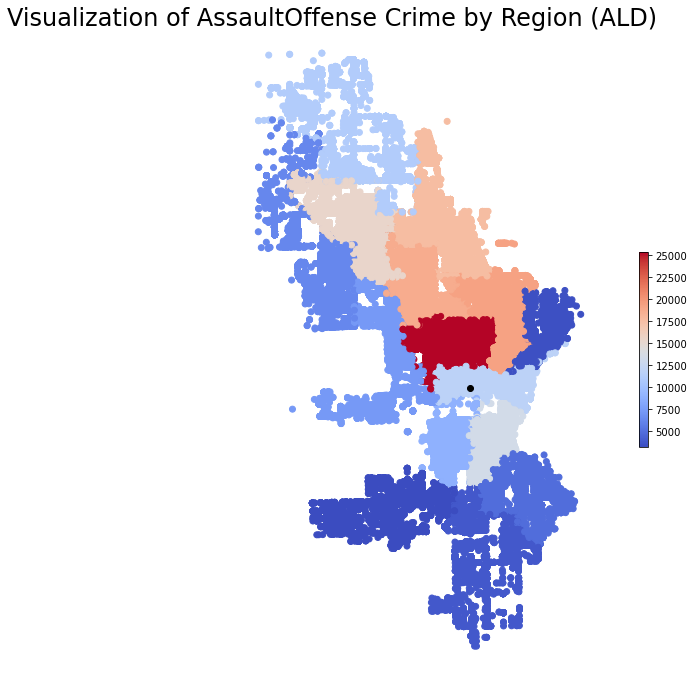

In [41]:
#df_gdf.plot(figsize=(15, 10));
fig, ax = plt.subplots(figsize=(15, 12))
df_gdf_ass.plot(ax=ax, column='count', cmap='coolwarm', legend=True, legend_kwds={'shrink': 0.3})
df_geo_marquette.plot(ax=ax,color='black')
ax.axis('off');
fig.suptitle('Visualization of AssaultOffense Crime by Region (ALD)', y=0.9, fontsize=24);

#for x, y, label in zip(df_gdf_ass.geometry.x, df_gdf_ass.geometry.y, df_gdf_ass.ALD):
    # xytext is similar to offset
    #ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords='offset points', size=16, color='blue')

# dataset of Theft

In [42]:
df_theft=df.where(df['AssaultOffense']==1).dropna()
df_theft

,IncidentNum,ReportedYear,ReportedMonth,ALD,RoughX,RoughY,Arson,AssaultOffense,Burglary,CriminalDamage,Homicide,LockedVehicle,Robbery,SexOffense,Theft,VehicleTheft,geometry,count
0,213370032,2021.0,12.0,11.0,2.545666e+06,367030.730972,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (2545665.878 367030.731),20245.0
2,213360166,2021.0,12.0,15.0,2.544385e+06,391319.863441,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (2544384.796 391319.863),83373.0
3,213360169,2021.0,12.0,2.0,2.531349e+06,412680.931212,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (2531348.937 412680.931),60738.0
4,213360137,2021.0,12.0,5.0,2.523364e+06,405935.349436,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (2523363.890 405935.349),35328.0
6,213360146,2021.0,12.0,3.0,2.561561e+06,389511.675661,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (2561560.825 389511.676),45425.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729911,212040097,2012.0,7.0,7.0,2.543789e+06,403835.896000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (2543789.040 403835.896),67469.0
729913,212060217,2020.0,6.0,9.0,2.536700e+06,415110.090000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (2536699.707 415110.090),42830.0
729920,212450122,2020.0,7.0,1.0,2.548998e+06,409303.020000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (2548997.790 409303.020),63606.0
729926,212930001,2020.0,10.0,12.0,2.553754e+06,373699.262000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (2553753.652 373699.262),60266.0


In [43]:
df_gdf_theft=gpd.GeoDataFrame(df_assault,geometry=gpd.points_from_xy(df_assault.RoughX,df_assault.RoughY)) #creates geometry columndq
df_gdf_theft.head()

,IncidentNum,ReportedYear,ReportedMonth,ALD,RoughX,RoughY,Arson,AssaultOffense,Burglary,CriminalDamage,Homicide,LockedVehicle,Robbery,SexOffense,Theft,VehicleTheft,geometry,count
0,213370032,2021.0,12.0,11.0,2.545666e+06,367030.730972,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (2545665.878 367030.731),3141
2,213360166,2021.0,12.0,15.0,2.544385e+06,391319.863441,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (2544384.796 391319.863),25411
3,213360169,2021.0,12.0,2.0,2.531349e+06,412680.931212,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (2531348.937 412680.931),15367
4,213360137,2021.0,12.0,5.0,2.523364e+06,405935.349436,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (2523363.890 405935.349),6234
6,213360146,2021.0,12.0,3.0,2.561561e+06,389511.675661,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (2561560.825 389511.676),3371


In [44]:
df2=df_theft.groupby('ALD').count()
df2

,IncidentNum,ReportedYear,ReportedMonth,RoughX,RoughY,Arson,AssaultOffense,Burglary,CriminalDamage,Homicide,LockedVehicle,Robbery,SexOffense,Theft,VehicleTheft,geometry,count
ALD,,,,,,,,,,,,,,,,,
1.0,17652,17652,17652,17652,17652,17652,17652,17652,17652,17652,17652,17652,17652,17652,17652,17652,17652
2.0,15367,15367,15367,15367,15367,15367,15367,15367,15367,15367,15367,15367,15367,15367,15367,15367,15367
3.0,3371,3371,3371,3371,3371,3371,3371,3371,3371,3371,3371,3371,3371,3371,3371,3371,3371
4.0,11800,11800,11800,11800,11800,11800,11800,11800,11800,11800,11800,11800,11800,11800,11800,11800,11800
5.0,6234,6234,6234,6234,6234,6234,6234,6234,6234,6234,6234,6234,6234,6234,6234,6234,6234
6.0,19339,19339,19339,19339,19339,19339,19339,19339,19339,19339,19339,19339,19339,19339,19339,19339,19339
7.0,18732,18732,18732,18732,18732,18732,18732,18732,18732,18732,18732,18732,18732,18732,18732,18732,18732
8.0,8806,8806,8806,8806,8806,8806,8806,8806,8806,8806,8806,8806,8806,8806,8806,8806,8806
9.0,11134,11134,11134,11134,11134,11134,11134,11134,11134,11134,11134,11134,11134,11134,11134,11134,11134


In [45]:
counts = []

for row in df_gdf_theft['ALD']:
    if row == 1:
        counts.append(df2.iloc[0][0])
    elif row == 2:
        counts.append(df2.iloc[1][0])
    elif row == 3:
        counts.append(df2.iloc[2][0])
    elif row == 4:
        counts.append(df2.iloc[3][0])
    elif row == 5:
        counts.append(df2.iloc[4][0])
    elif row == 6:
        counts.append(df2.iloc[5][0])
    elif row  == 7:
        counts.append(df2.iloc[6][0])
    elif row == 8:
        counts.append(df2.iloc[7][0])
    elif row == 9:
        counts.append(df2.iloc[8][0])
    elif row == 10:
        counts.append(df2.iloc[9][0])
    elif row == 11:
        counts.append(df2.iloc[10][0])
    elif row == 12:
        counts.append(df2.iloc[11][0])
    elif row == 13:
        counts.append(df2.iloc[12][0])
    elif row == 14:
        counts.append(df2.iloc[13][0])
    elif row ==15:
        counts.append(df2.iloc[14][0])
    else:
        counts.append(None)

df_gdf_theft['count']=counts

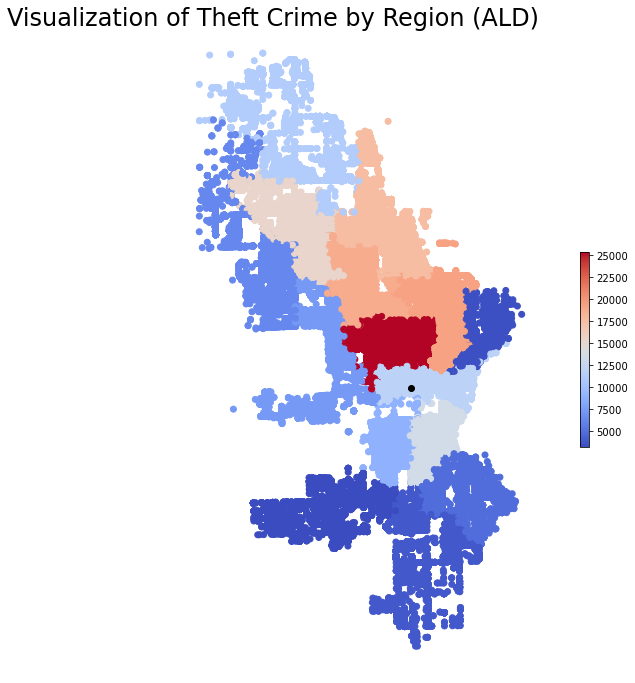

In [46]:
#df_gdf.plot(figsize=(15, 10));
fig, ax = plt.subplots(figsize=(15, 12))
df_gdf_theft.plot(ax=ax, column='count', cmap='coolwarm', legend=True, legend_kwds={'shrink': 0.3})
df_geo_marquette.plot(ax=ax,color='black')
ax.axis('off');
fig.suptitle('Visualization of Theft Crime by Region (ALD)', y=0.9, fontsize=24);


In [47]:
#world.plot(figsize=(15, 10));

In [ ]:
# plot points where marker size is based on data column (using pandas dataframe converted to geodataframe)
#fig, ax = plt.subplots(figsize=(15, 10))
#world.plot(ax=ax)
#df_gdf.plot(ax=ax, color='orange', markersize=df_gdf.IncidentNum, alpha=0.5, edgecolor='k');
#fig.suptitle('Tallest Buildings', y=0.85, fontsize=24);

In [48]:
# read in geojson to create geodataframe
# source: geoplot datasets using geopandas - gpd.read_file(gplt.datasets.get_path('contiguous_usa')), 2019 gdp source: Wikipedia, Bureau of Economic Analysis
# shapefiles can be converted to geojson using QGIS
path = 'https://raw.githubusercontent.com/groundhogday321/map-layers/main/us_states.geojson'
us_states = gpd.read_file(path)
us_states

,state,population,gdp,geometry
0,Minnesota,5303925,379388000000,"POLYGON ((-89.59941 48.01027, -89.48888 48.013..."
1,Montana,989415,51934000000,"POLYGON ((-111.19419 44.56116, -111.29155 44.7..."
2,North Dakota,672591,54044000000,"POLYGON ((-96.60136 46.35136, -96.53891 46.199..."
3,Idaho,1567582,85552000000,"POLYGON ((-111.04973 44.48816, -111.05025 42.0..."
4,Washington,6724540,632013000000,"POLYGON ((-116.99807 46.33017, -116.90653 46.1..."
...,...,...,...,...
44,New Jersey,8791894,625659000000,"POLYGON ((-73.91280 40.96019, -73.95233 40.750..."
45,New York,19378102,1705127000000,"POLYGON ((-74.67903 41.35549, -74.84044 41.426..."
46,Pennsylvania,12702379,788500000000,"POLYGON ((-74.89175 40.08179, -75.12882 39.949..."
47,Maine,1328361,67129000000,"POLYGON ((-67.13734 45.13745, -66.96466 44.809..."
